In [49]:
import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import erf

In [50]:
url="https://covid19.isciii.es/resources/serie_historica_acumulados.csv"
t=requests.get(url).text
s=t.split("NOTA")[0]

In [51]:
#df=pd.read_csv('serie_historica_acumulados.csv', parse_dates=True)

In [52]:
df=pd.read_csv(io.StringIO(s), parse_dates=True)

In [53]:
df.fillna(0, inplace=True)

In [54]:
df['FECHA'] = pd.to_datetime(df['FECHA'],dayfirst=True)

In [55]:
df

,CCAA,FECHA,CASOS,Hospitalizados,UCI,Fallecidos,Recuperados
0,AN,2020-02-20,0.0,0.0,0.0,0.0,0.0
1,AR,2020-02-20,0.0,0.0,0.0,0.0,0.0
2,AS,2020-02-20,0.0,0.0,0.0,0.0,0.0
3,IB,2020-02-20,1.0,0.0,0.0,0.0,0.0
4,CN,2020-02-20,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
983,ML,2020-04-11,98.0,43.0,3.0,2.0,18.0
984,MC,2020-04-11,1449.0,537.0,91.0,97.0,344.0
985,NC,2020-04-11,3969.0,1663.0,124.0,232.0,650.0
986,PV,2020-04-11,10772.0,5547.0,459.0,804.0,4867.0


In [56]:
df = df.groupby('FECHA')['Fallecidos'].sum().to_frame()

In [57]:
df=df.sort_values(by='Fallecidos')

In [58]:
df['Index'] = range(1, len(df) + 1)

In [59]:
df=df.set_index('Index')

In [60]:
df['Dif. fallecidos'] = df['Fallecidos'] - df['Fallecidos'].shift(1)

In [61]:
df.fillna(0, inplace=True)

In [62]:
df.drop('Fallecidos', axis=1, inplace=True)

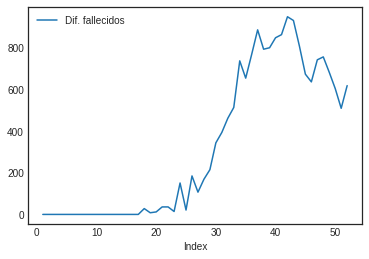

In [63]:
df.plot()

In [64]:
yData=df[df['Dif. fallecidos']>0].to_numpy()
yData=yData.reshape(yData.size)
xData=np.arange(yData.size)

In [65]:
yData

array([ 28.,   8.,  12.,  36.,  36.,  14., 151.,  21., 185., 107., 169.,
       215., 344., 394., 462., 514., 738., 655., 769., 887., 794., 801.,
       849., 864., 950., 932., 809., 674., 637., 743., 757., 683., 605.,
       510., 619.])

In [66]:
#Example of regression function - Polynomial
#def func(x, a ,b, c, d):
#    return a*np.exp(b*x)
#    return a+ b*x + c*pow(x,2)+ d*pow(x,3) #+ e*pow(x,4) + f*pow(x,5) + g*pow(x,6)

In [67]:
#Example of regression function
#def func(x, amp, cen, wid):
#    return amp * np.exp(-(x-cen)**2 / wid)

In [68]:
#Regression function - skew normal
def func(x, sigmag, mu, alpha,a):
    c = 0
    #normal distribution
    normpdf = (1/(sigmag*np.sqrt(2*np.pi)))*np.exp(-(np.power((x-mu),2)/(2*np.power(sigmag,2))))
    normcdf = (0.5*(1+erf((alpha*((x-mu)/sigmag))/(np.sqrt(2)))))
    return 2*a*normpdf*normcdf + c

In [69]:
popt, pcov = curve_fit(func, xData, yData, p0=(1,1,1,20000))
print(popt)
print(pcov)

[1.75450656e+01 1.43910143e+01 3.43170606e+00 2.25169365e+04]
[[ 3.66998544e+00 -8.76777825e-01  1.29613219e+00  2.35618036e+03]
 [-8.76777825e-01  2.76823738e-01 -3.31142085e-01 -5.29859159e+02]
 [ 1.29613219e+00 -3.31142085e-01  5.45768823e-01  7.65399011e+02]
 [ 2.35618036e+03 -5.29859159e+02  7.65399011e+02  1.72771289e+06]]


In [70]:
xFit = np.arange(0.0, yData.size + 10, 1)

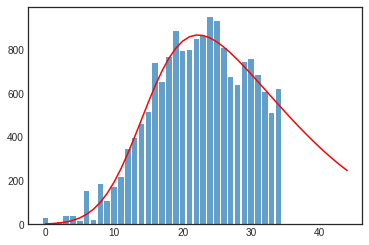

In [71]:
plt.style.use('seaborn-white')
plt.bar(xData, yData, align='center', alpha=0.7)
plt.plot(xFit, func(xFit, *popt), 'r')
plt.show()

In [72]:
#Prediction for the next day:
int(func(yData.size, *popt))

513